# EDA of Financial news sentiment

Eugene Pirono

This is an exploratory data analysis of the financial news sentiment data set obtained from kaggle. There are 2 dataset that is used that are concetenated. 



In [67]:
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
df = pd.read_csv('/Users/eugene/Desktop/NLP-Project/data/all-data.csv',encoding='ISO-8859-1', header=None)
df.columns = ['sentiment', 'text']
df

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [54]:
df2 = pd.read_csv('/Users/eugene/Desktop/NLP-Project/data/Sentiment_Stock_data.csv',encoding='ISO-8859-1')
df2 = df2.drop(df2.columns[0], axis=1)
df2['Sentiment'] = df2['Sentiment'].replace({1: 'positive', 0: 'negative'})
df2.columns = ['sentiment', 'text']
df2

,sentiment,text
0,negative,"According to Gran , the company has no plans t..."
1,positive,"For the last quarter of 2010 , Componenta 's n..."
2,positive,"In the third quarter of 2010 , net sales incre..."
3,positive,Operating profit rose to EUR 13.1 mn from EUR ...
4,positive,"Operating profit totalled EUR 21.1 mn , up fro..."
...,...,...
108746,positive,Philippines president Rodrigo Duterte urges pe...
108747,positive,Spain arrests three Pakistanis accused of prom...
108748,positive,"Venezuela, where anger over food shortages is ..."
108749,positive,A Hindu temple worker has been killed by three...


In [59]:
merged_df = pd.concat([df, df2])
merged_df = merged_df.drop(df[df['sentiment'] == 'neutral'].index)

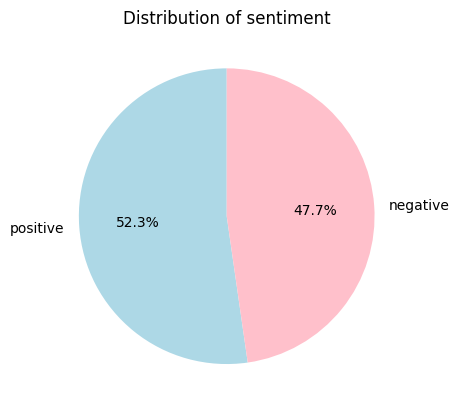

In [62]:
unique_counts = merged_df['sentiment'].value_counts()
colors = ['#ADD8E6', '#FFC0CB']
plt.pie(unique_counts.values, labels=unique_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of sentiment")
plt.show()

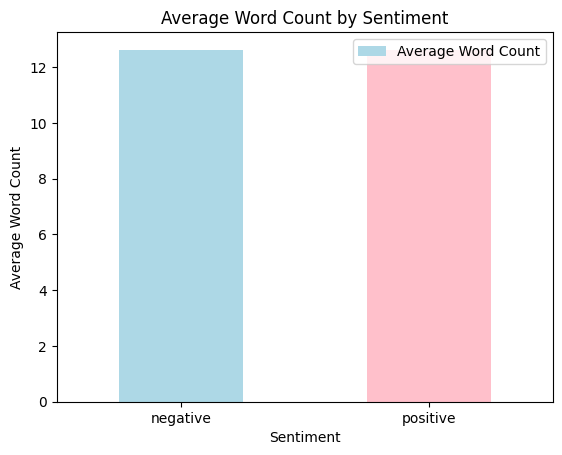

In [65]:
merged_df['text_length'] = merged_df['text'].apply(lambda x: len(str(x).split()))
word_counts = merged_df.groupby('sentiment')['text_length'].mean().reset_index()
word_counts.columns = ['Sentiment', 'Average Word Count']
colors = ['#ADD8E6', '#FFC0CB']
ax = word_counts.plot(kind='bar', x='Sentiment', y='Average Word Count', color=colors, rot=0)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Average Word Count')
ax.set_title('Average Word Count by Sentiment')
plt.show()

# Feature Engineering

- Text length
    - Counting the frequency of words in the text column and using them as features can help capture the meaning and sentiment of the text. 
- Word frequencies
    - The length of the text may be related to its sentiment. Longer texts may contain more details and emotional content, and may be more likely to have a positive or negative sentiment.
- Part-of-speech (POS) tags
    - POS tagging involves labeling each word in the text with its grammatical category (e.g. noun, verb, adjective, etc.). The distribution of POS tags in a text can be indicative of its sentiment. For example, texts with a higher proportion of adjectives and adverbs may be more likely to have a positive or negative sentiment.
- Sentiment lexicons
    - Lexicons are dictionaries of words or phrases that are associated with specific sentiments. By checking if the words in the text column appear in a sentiment lexicon, you can create features that capture the presence or absence of specific sentiment words.
- Named entities
    - Named entities are specific objects, people, or places mentioned in the text. The presence or absence of certain named entities may be related to the sentiment of the text.



In [68]:
merged_df

,sentiment,text,text_length
2,negative,The international electronic industry company ...,36
3,positive,With the new production plant the company woul...,33
4,positive,According to the company 's updated strategy f...,41
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,25
6,positive,"For the last quarter of 2010 , Componenta 's n...",39
...,...,...,...
108746,positive,Philippines president Rodrigo Duterte urges pe...,34
108747,positive,Spain arrests three Pakistanis accused of prom...,8
108748,positive,"Venezuela, where anger over food shortages is ...",42
108749,positive,A Hindu temple worker has been killed by three...,47
